# Week 8
## Overview

It's the last time we meet in class for exercises! And to celebrate this mile-stone, I've put together an very nice little set of exercises. And if you're behind, don't worry. The workload is low!

  - Part A: First, we play around with sentiment analysis
  - That's it!


# Part A: Sentiment analysis

Sentiment analysis is another highly useful technique which we'll use to make sense of the Wiki
data. Further, experience shows that it might well be very useful when you get to the project stage of the class.



> **Video Lecture**: Uncle Sune talks about sentiment and his own youthful adventures.



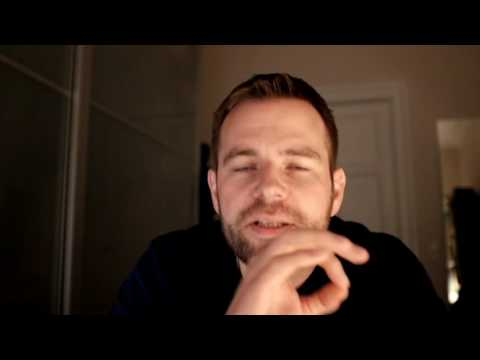

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("JuYcaYYlfrI",width=800, height=450)

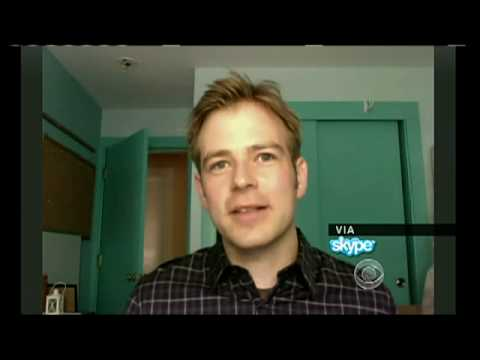

In [2]:
# There's also this one from 2010 with young Sune's research
YouTubeVideo("hY0UCD5UiiY",width=800, height=450)

> Reading: [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752) 


*Exercise*: Sentiment distribution. 
> 
> * Download the LabMT wordlist. It's available as supplementary material from [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752) (Data Set S1). Describe briefly how the list was generated.
> * Based on the LabMT word list, write a function that calculates sentiment given a list of tokens (the tokens should be lower case, etc).
> * Iterage over the nodes in your network, tokenize each page, and calculate sentiment every single page. Now you have sentiment as a new nodal property.
> * Calculate the average sentiment across all the pages. Also calculate the median, variance, 25th percentile, 75th percentile.
> * Remember histograms? Create a histogram of all of the artists's associated page-sentiments. (And make it a nice histogram - use your histogram making skills from Week 2). Add the mean, meadian, ect from above to your plot.
> * Who are the 10 artists with happiest and saddest pages?

<div class="alert alert-block alert-info">
As long as you get the plots right, it's OK to use LLM help here.
</div>

*Exercise*: Community sentiment distribution. 
  
> * Last week we calculated the stuctural communities of the graph. For this exercise, we use those communities (just the 10 largest ones, or all your communities if you have fewer than 10). Specifically, you should calculate the average the average sentiment of the nodes in each community to find a *community level sentiment*. 
>   - Name each community by its three most connected bands. (Or feed the list of bands in each community and ask the LLM to come up with a good name for the community).
>   - What are the three happiest communities? (or the two happiest if you have 5 or fewer communities)
>   - what are the three saddest communities? (or the two happiest if you have 5 or fewer communities)
>   - Do these results confirm what you can learn about each community by comparing to the genres, checking out the word-clouds for each community, and reading the wiki-pages? 
> * Compare the sentiment of the happiest and saddest communities to the overall (entire network) distribution of sentiment that you calculated in the previous exercise. Are the communities very differenct from the average? Or do you find the sentiment to be quite similar across all of the communities?

<div class="alert alert-block alert-info">
As above, feel free to go nuts with help from an LLM with this exercise for the technical parts. But try to answer the questions about interpreting the results with your own human brain.
</div>

**Note**: Calculating sentiment may take a long time, so arm yourself with patience as your code runs (remember to check that it runs correctly, before waiting patiently). Further, these tips may speed things up. And save somewhere, so you don't have to start over.

**Tips for speed**
* If you use `freqDist` prior to finding the sentiment, you only have to find it for every unique word and hereafter you can do a weighted mean.
* More tips for speeding up loops https://wiki.python.org/moin/PythonSpeed/PerformanceTips#Loops

In [6]:
import sys
sys.path.append("..")

import json
import networkx as nx
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np

from lib.SentimentAnalysis import SentimentAnalysis
from lib.Loader import Loader

### Exercise 1

In [7]:
def load_labmt_wordlist(filepath):
    """Loads the LabMT wordlist into a dictionary."""
    labmt_words = {}
    with open(filepath, 'r') as f:
        next(f)  # Skip title
        next(f)  # Skip subtitle
        next(f)  # Skip blank line
        next(f)  # Skip header
        for line in f:
            parts = line.strip().split('\t')
            word = parts[0]
            happiness_score = float(parts[2])
            labmt_words[word] = happiness_score
    return labmt_words

### Exercise 2

### Execute the exercises

Network loaded: 489 nodes, 9600 edges
Partition loaded for 488 artists

=== Sentiment Statistics ===
Mean: 5.5427
Median: 5.5410
Mode: 5.5410
Variance: 0.0023
Standard Deviation: 0.0476
25th Percentile: 5.5138
75th Percentile: 5.5728

=== Top 10 Happiest Pages ===
1. Boys Like Girls: 5.7045
2. Lenny Kravitz: 5.6972
3. Train (band): 5.6615
4. Christopher Cross: 5.6600
5. Fun (band): 5.6592
6. Tracy Chapman: 5.6590
7. Michael Martin Murphey: 5.6557
8. Melissa Etheridge: 5.6437
9. Counting Crows: 5.6397
10. Simple Plan: 5.6386

=== Top 10 Saddest Pages ===
1. Five Finger Death Punch: 5.3744
2. Rage Against the Machine: 5.3937
3. Rob Zombie: 5.4118
4. Marilyn Manson: 5.4149
5. Sex Pistols: 5.4177
6. Canned Heat: 5.4277
7. Ted Nugent: 5.4323
8. Pantera: 5.4328
9. Gary Glitter: 5.4328
10. Quiet Riot: 5.4330



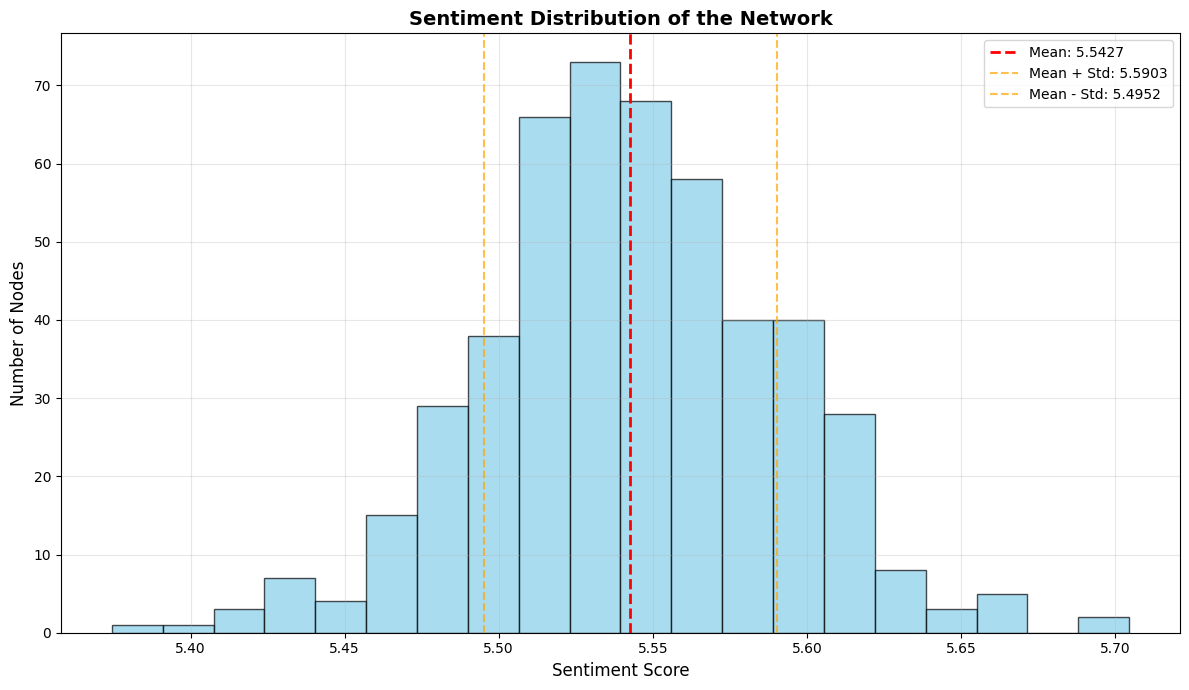

Happiest Community: 4 (Avg Sentiment: 5.5623)
Saddest Community: 0 (Avg Sentiment: 5.5209)
Overall Network Mean: 5.5427


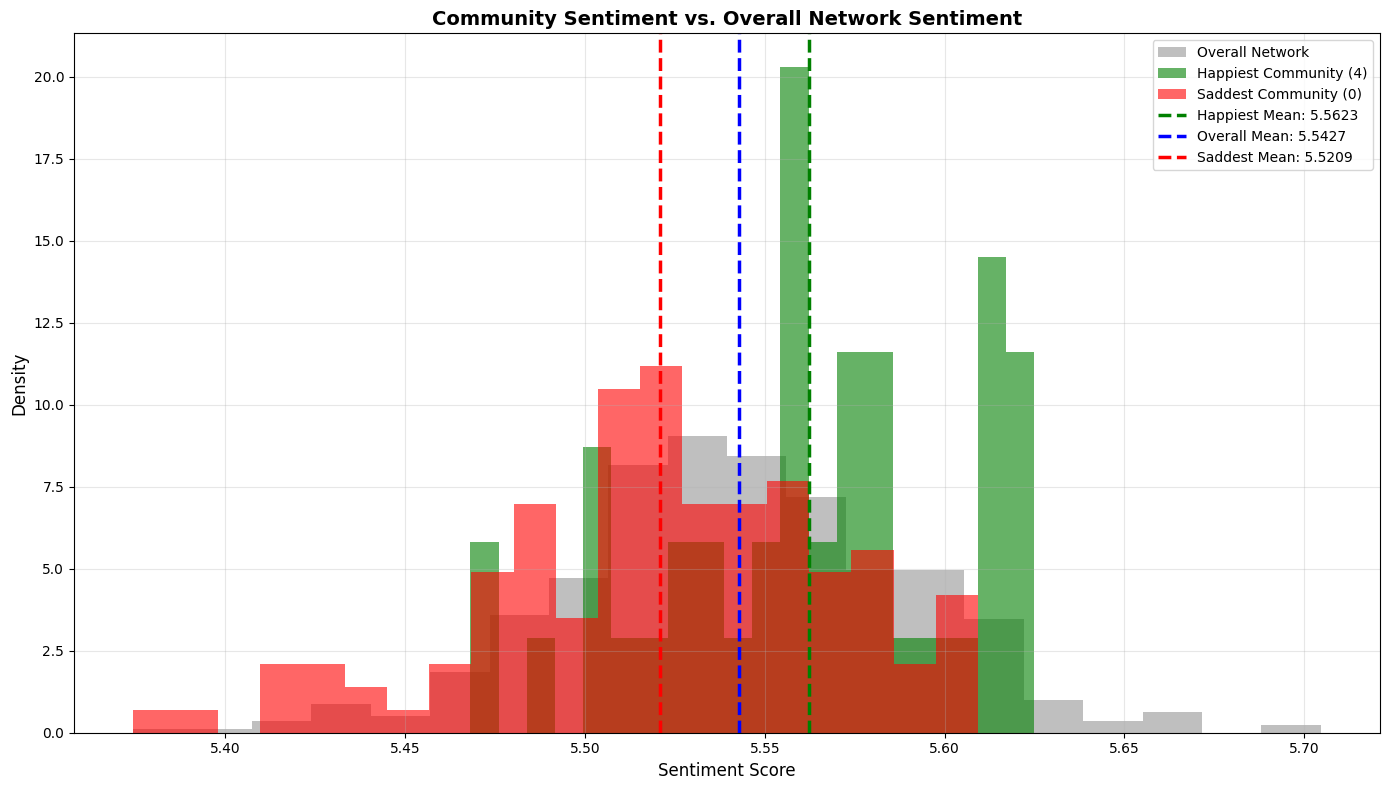

In [8]:
if __name__ == '__main__':
    # Load data
    labmt_words = load_labmt_wordlist('../Week_8/wordlist_week8.txt')
    
    GRAPH_FILEPATH = "../data/rock/performers_graph.json"
    PARTITION_FILEPATH = "../data/rock/community_detection_results_partition.json"
    loader = Loader()
    G = loader.load_network(GRAPH_FILEPATH)
    
    partition = loader.load_partition(PARTITION_FILEPATH)
    
    # Create sentiment analysis object
    sentimentAnalysis = SentimentAnalysis()
    
    # Exercise 1: Overall sentiment distribution
    # This now returns: (sentiments_list, node_sentiments_dict, stats_dict)
    overall_sentiments, node_sentiments, overall_stats = sentimentAnalysis.sentiment_distribution(G, labmt_words)
    
    # Exercise 2: Community sentiment distribution
    sentimentAnalysis.community_sentiment_distribution(G, partition, labmt_words, overall_sentiments, overall_stats)